In this kernel we will be using Support vector regression to predict the salary of employees.In the data set we have the details of the desigination and the salary if the employee.This kernal is a work in process.Please do vote if you like my work.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/polynomial-position-salary-data/Position_Salaries.csv


**Importing Python Modules**

In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../input/polynomial-position-salary-data/Position_Salaries.csv')
df.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


From the dataset we can see that there ten positions in the company and we can see the corresponding salary for each level.Now we will implement SVR to predict the salary based on the level.

**Creating the Matrix of features**

In [4]:
X=df.iloc[:,1:2].values  # For the features we are selecting all the rows of column Level represented by column position 1 or -1 in the data set.
y=df.iloc[:,2].values    # for the target we are selecting only the salary column which can be selected using -1 or 2 as the column location in the dataset
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

**Feature Scaling:**

Feature scaling is applied to the Salary.Feature scaling helps us to get better result from our SVR algorithm.y is a vector and we nned to convert it into 2d array before doing a feature scaling.

In [5]:
y = y.reshape(len(y),1)

In [6]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


Now we have conveted y to a 2d Array

In [7]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [8]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [9]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


**Training the SVR on the whole dataset**

In [10]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X,y)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

**Predicting New Result**

In [11]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

array([170370.0204065])

**Vizualizing the SVR Results **

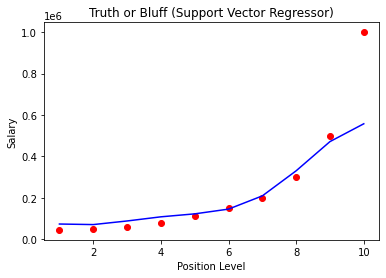

In [12]:
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color='red')
plt.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X)),color='blue')
plt.title('Truth or Bluff (Support Vector Regressor)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

**Vizualising the SVR results (for higher resolution and smoother curve)**